<a href="https://colab.research.google.com/github/ErikMayerPSU/AuroraNSL_2024/blob/main/Code/viewline/half_sphere_testing_2025_12_02_1645.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing plotting OP-13 output on half sphere
original


From: https://stackoverflow.com/questions/41105754/heat-map-half-sphere-plot


In [1]:
import logging; logging.basicConfig(level=logging.INFO)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1

In [20]:
# OP-13 data

df_eflux = pd.read_csv(r"https://raw.githubusercontent.com/ErikMayerPSU/AuroraNSL_2024/main/data/St%20patrick's%20day%202015/Eflux/20150318_0200UT_Eflux_e%2Call.txt", header=None, skiprows=1, nrows=7680, sep='\s+', on_bad_lines='skip')

# Define new headers
eflux_headers = ["MLT", "ML", "[mW m^-2]"]

# Set the column headers
df_eflux.columns = eflux_headers

#Set mW m^-2 to yes or no based on aurora visibility threshold
#df_eflux.loc[df_eflux["[mW m^-2]"]>=1, "[mW m^-2]"] = 1
#df_eflux.loc[df_eflux["[mW m^-2]"]<1, "[mW m^-2]"] = 0

df_eflux

,MLT,ML,[mW m^-2]
0,0.00,50.0,0.009205
1,0.00,50.5,0.009303
2,0.00,51.0,0.005775
3,0.00,51.5,0.020590
4,0.00,52.0,0.000387
...,...,...,...
7675,23.75,87.5,0.023140
7676,23.75,88.0,0.022190
7677,23.75,88.5,0.023080
7678,23.75,89.0,0.016270


In [23]:
#convert eflux from df to array
array_eflux = df_eflux.to_numpy()

#flatten eflux array
array_eflux_flux = array_eflux[0:7680,2:3]

array_eflux_flux_flatten = array_eflux_flux.flatten(order = 'C')
print(array_eflux_flux_flatten)

#normalize eflux values
min_val = np.min(array_eflux_flux_flatten)
max_val = np.max(array_eflux_flux_flatten)
array_eflux_flux_flatten_norm = (array_eflux_flux_flatten - min_val) / (max_val - min_val)
print(array_eflux_flux_flatten_norm)

[0.009205 0.009303 0.005775 ... 0.02308  0.01627  0.02794 ]
[0.00095172 0.00096185 0.00059708 ... 0.00238627 0.00168218 0.00288875]


(7680, 3)
[[0.         0.97429139 0.09167701]
 [0.         0.99417489 0.05144748]
 [0.         1.01405839 0.04730149]
 [0.         1.03394189 0.00781741]
 [0.         1.05382538 0.01589123]
 [0.         1.07370888 0.06990281]
 [0.         1.09359238 0.01715261]
 [0.         1.11347588 0.00999173]
 [0.         1.13335938 0.0097043 ]
 [0.         1.15324287 0.00302109]
 [0.         1.17312637 0.00494417]]
(80, 96)
(80, 96)


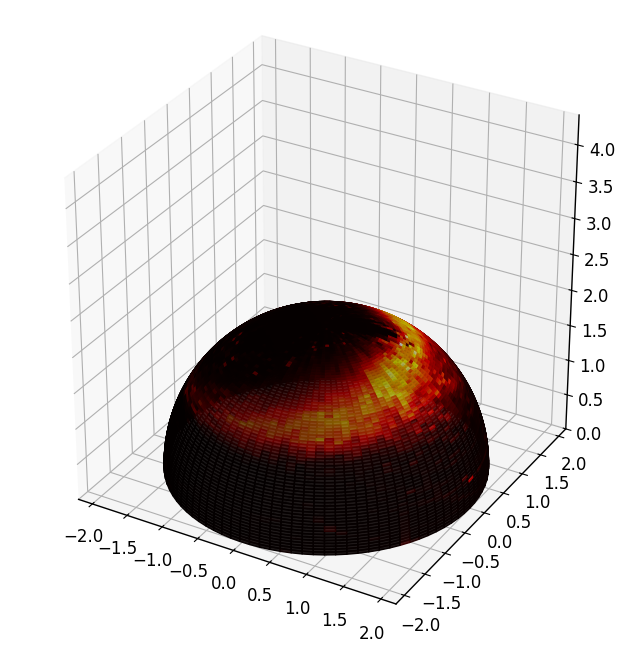

In [24]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

#theta inclination angle
#phi azimuthal angle
n_theta = 80 # number of values for theta (ML)
n_phi = 96  # number of values for phi (MLT)
r = 2        #radius of sphere

theta, phi = np.mgrid[0.0:0.5*np.pi:n_theta*1j, 0.0:2.0*np.pi:n_phi*1j]

x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

# mimic the input array
# array columns phi, theta, value
# first n_theta entries: phi=0, second n_theta entries: phi=0.0315..
inp = []
#orginal code
#for j in phi[0,:]:
#    for i in theta[:,0]:
#        val = 0.7+np.cos(j)*np.sin(i+np.pi/4.)# put something useful here
#        inp.append([j, i, val])

index = 0  # Initialize an index variable
for j_index in range(n_phi):  # Iterate using range for integer indices
    for i_index in range(n_theta):  # Iterate using range for integer indices
        j = phi[0, j_index]
        i = theta[i_index, 0]
        val = array_eflux_flux_flatten_norm[index]  # Access using integer index
        inp.append([j, i, val])
        index += 1  # Increment index for the next element

inp = np.array(inp)
print(inp.shape)
print(inp[49:60, :])

#reshape the input array to the shape of the x,y,z arrays.
c = inp[:,2].reshape((n_phi,n_theta)).T
print(z.shape)
print(c.shape)


#Set colours and render
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
#use facecolors argument, provide array of same shape as z
# cm.<cmapname>() allows to get rgba color from array.
# array must be normalized between 0 and 1
ax.plot_surface(
    x,y,z,  rstride=1, cstride=1, facecolors=cm.hot(c/c.max()), alpha=0.9, linewidth=1)
ax.set_xlim([-2.2,2.2])
ax.set_ylim([-2.2,2.2])
ax.set_zlim([0,4.4])
ax.set_aspect("equal")
#ax.plot_wireframe(x, y, z, color="k") #not needed?!
#plt.savefig(__file__+".png")
plt.show()